### Fitting problem 1

The data for this problem is available in the file `fit_1.dat` which can 
be downloaded from 
http://www.eg.bucknell.edu/~phys310/hw/hw4.html.  One option is to download the data file to 
a local directory, and then import it using `np.loadtxt()`.  Another option is to download it 
directly into the Jupyter notebook.  I will use the second option here.

In [1]:
import numpy as np

import urllib  # for importing data from a URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.  (html-version compatible)
%matplotlib notebook
# to get figures to show up in pdf use next line:
#matplotlib inline
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

####  Options for getting data into notebook
+ Start by downloading the data files into the working directory. The `np.loadtxt` 
function imports the content of the data file into a `numpy` array.
The `unpack = 'True'` option transposes the array so that each column ofo the data 
file is in a separate array.
+ Download directly from a URL

In this notebook I use the second method.

In [3]:
f = urllib.request.urlopen('https://www.eg.bucknell.edu/~phys310/hw/assignments/fitting_1/fit_1.dat')
data = np.loadtxt(f)
print(data)

[[14.34584302  0.31014499]
 [14.34084409  0.17765324]
 [13.51682503  0.61953406]
 [14.71693179  0.12658283]
 [14.0345553   0.4634122 ]
 [14.1016822   0.3466875 ]
 [14.87831111  0.41390437]
 [14.085719    0.45031151]
 [14.63710135  0.44658677]
 [14.39090758  0.5398712 ]
 [14.41117749  0.69849826]
 [14.28037667  0.50035189]
 [14.06258172  0.61155368]
 [14.46253567  0.61415366]
 [14.32903938  0.18759991]
 [14.45499461  0.41534817]
 [14.45254106  0.10353485]
 [14.49818213  0.67624977]
 [15.18406411  0.54377652]
 [15.19346374  0.71690576]]


These data come from twenty (20) experiments
nominally measuring the same physical quantity. The data for each measurement (point) 
is on a single line in the file. The first number on each line is the value of the 
measured quantity, and the second is the uncertainty in the measurement.  When using np.loadtxt the `unpack=True`
option takes the the transpose of the file, putting all the measured values in 
the first element of the array `data`, and the uncertainties in the second 
element. Here the data were taken directly from the URL and stored in the array `data`. In the next cell the transpose is taken of the `data` array.


#### (a) What value do you quote for this quantity based on the data? (Include an uncertainty.)

Best value is the weighted mean of the data.
\begin{equation}
x_{\rm CE}=\frac{\sum \limits_{i=1}^{N} w_i x_i}{\sum \limits_{i=1}^{N}  w_i} 
    \qquad \mbox{where} \qquad w_i=\frac{1}{\alpha_i^2} 
    \qquad \mbox{and uncertainty} \qquad \alpha_{\rm CE}=1.0/\sqrt{\sum \limits_i w_i}
\end{equation}

In [4]:
y, u = data.T
w = 1/u**2                      # Calculate weights
mean = np.sum(y*w)/np.sum(w)    # Calculate weighted mean
wunc = 1./np.sqrt(np.sum(w))    # Caclulate uncertainy in the weighted mean

#We can round the numbers to one significant figure in uncertainty and to same decimal point using the round() function.
print(mean, wunc)
print(round(mean,2),round(wunc,2))

14.468891058048237 0.059165547611445275
14.47 0.06


#### Result:

$$ \langle y \rangle = 14.47 \pm 0.06  $$

#### (b) Each data point has its own uncertainty $\alpha_i$. How many of the data points lie within 1 $\alpha_i$ of the mean value you determined?

<IPython.core.display.Javascript object>


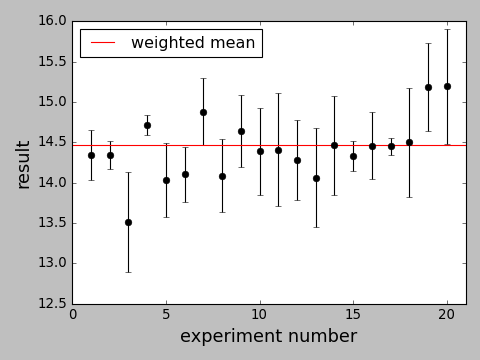

In [5]:
plt.figure()
x = np.linspace(1,len(y),len(y))
plt.errorbar(x,y,u, fmt = 'ko')
plt.axhline(mean, c='r', label='weighted mean')
#plt.axhline(mean + wunc)
#plt.axhline(mean - wunc)
plt.xlabel('experiment number')
plt.legend(loc='upper left')
plt.xlim(0,21)
plt.ylabel('result');

Visual inspection of the graph, along with use of the zooming feature of the
interactive graphics, reveal that 15 of the fall with one standard deviation 
of the weighted mean.


It's probably easier to have the computer do the counting. In order to compute the number within one standard deviation of the weighted mean, we can calculate the normalized residuals (`r_norm`) 
and count the number with magnitude < 1. 

In [6]:
# METHOD 1

r_norm = (y - mean)/u  # Calculate normalized residuals

cnt = 0
for i in range(len(r_norm)):
    if np.abs(r_norm[i]) < 1:
        cnt += 1
print(cnt, 'of the', len(r_norm), 'values are within 1 alphi_i of the weighted mean')

15 of the 20 values are within 1 alphi_i of the weighted mean


In [7]:
# METHOD 2

cnt  = np.sum(np.abs(r_norm) < 1)
print(cnt, 'of the', len(r_norm), 'values are within 1 alpha_i of the weighted mean')

15 of the 20 values are within 1 alpha_i of the weighted mean


In [8]:
# to see how Method 2 works uncomment the following line
#print(np.abs(r_norm) < 1)
# in the sum command every TRUE is interpreted as 1 and every FALSE as zero

#### (c) What is the goodness-of-fit parameter $\chi^2$ for this data?

$$ \chi^2 = \sum_i\left(\frac{y_i - y(x_i)}{\alpha_i}\right)^2 $$ 


The goodness of fit $\chi^2$ is simply the sum of the squares of the normalized residuals.

In [9]:
chisq = sum(r_norm**2)
print(chisq, len(r_norm))

14.66896721507343 20


The goodness of fit parameter is $\chi^2 = 14.7$, which is close to the number
of data points, implying consistency with the idea that the measurements are all of the
same quantity, and it makes sense to average them.

#### System information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [10]:
%load_ext version_information

In [11]:
version_information numpy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1127.19.1.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
matplotlib 3.3.0
Wed Feb 09 17:06:33 2022 EST